In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
import requests
import io
url = "D:/hihihih/Canada.xlsx"
df_can = pd.read_excel(
    url,
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis =1, inplace=True)
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_can.head()
df_can.shape

(195, 38)

In [6]:
all(isinstance(column, str) for column in df_can.columns)

False

In [7]:
df_can.columns = list(map(str, df_can.columns)) 

In [8]:
df_can.set_index('Country',inplace=True)
df_can.head()
df_can.shape

(195, 37)

In [9]:
df_can['Total'] = df_can.iloc[:, 3:37].sum(axis=1)

# let's view the first five elements and see how the dataframe was changed
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [10]:
years = list(map(str, range(1980, 2014)))

In [11]:
#mpl.style.use('ggplot')

In [12]:
df_can.sort_values(['Total'], ascending= False, inplace=True, axis=0)
df_top5 = df_can.head()
df_top5 = df_top5[years].transpose()
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


<Axes: >

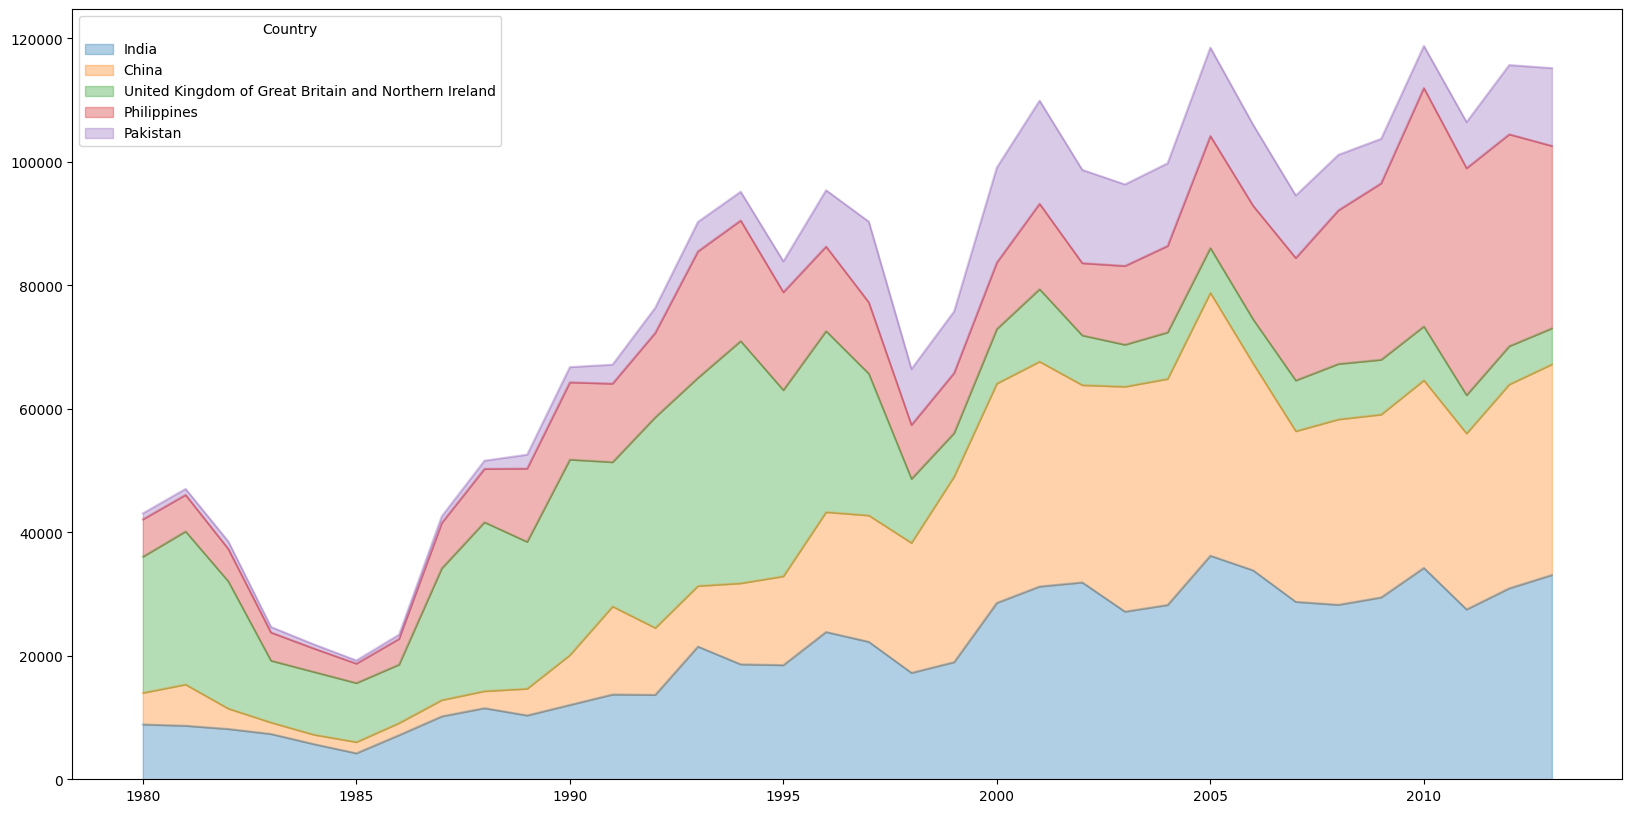

In [13]:
#chuyển giá trị về int hết
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area', alpha = 0.35, stacked=True, figsize=(20,10))
#df_top5.plot()


Use the scripting layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.45

<Axes: >

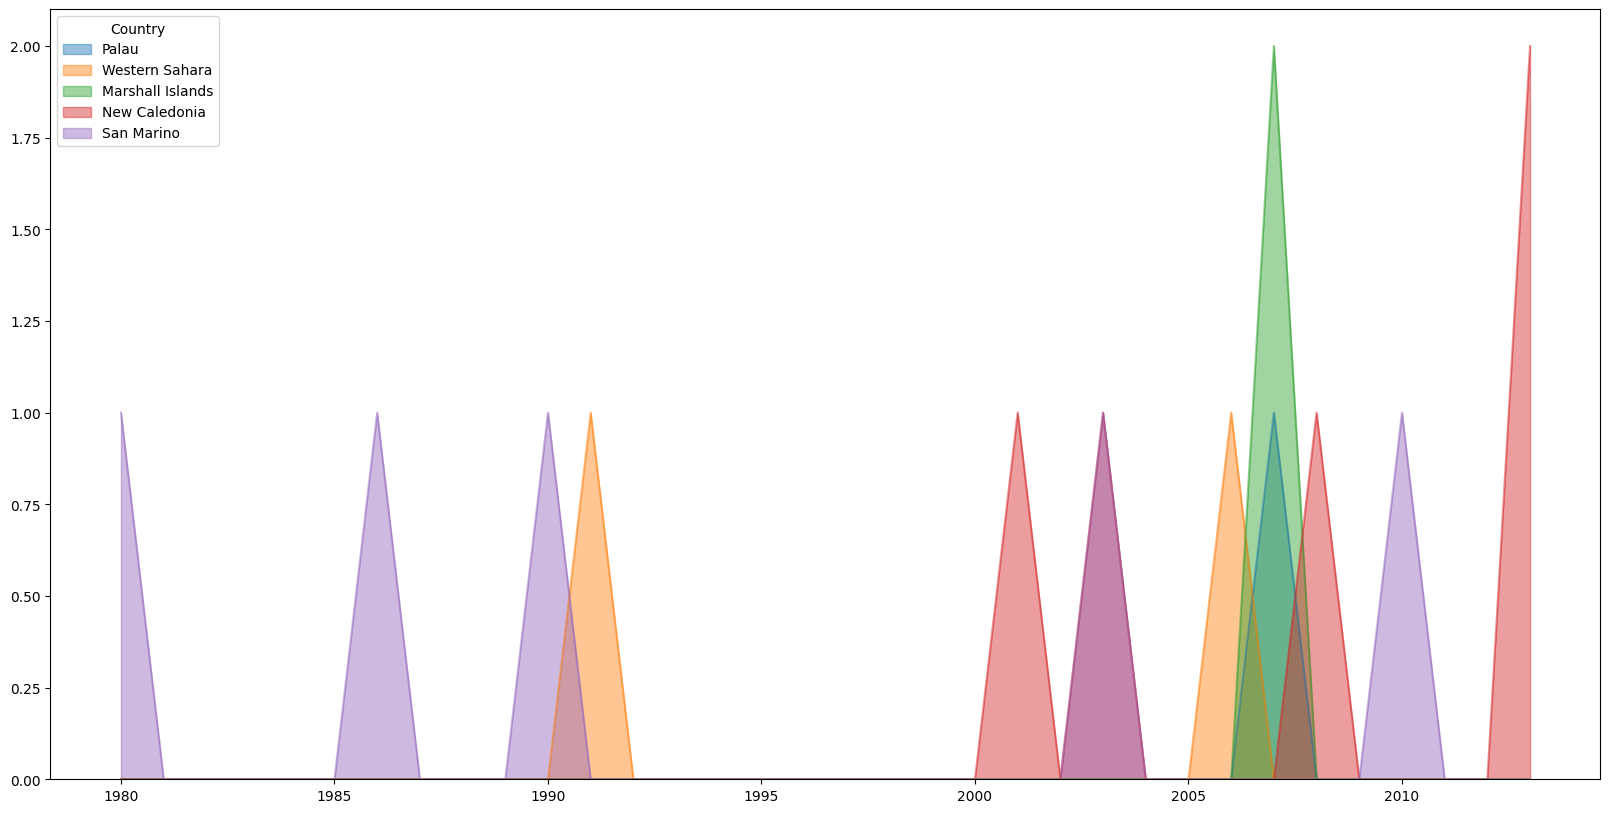

In [14]:
df_can.sort_values(['Total'], ascending=True, axis=0, inplace=True)
new = df_can.head(5)
new = new[years].transpose()
new.index = new.index.map(int)
new.plot(kind='area', stacked=False, alpha = 0.45, figsize=(20,10))

<Axes: >

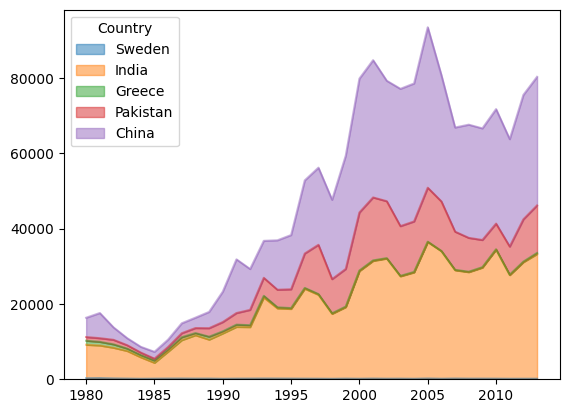

In [15]:
moi2 = df_can.loc[['Sweden','India','Greece', 'Pakistan', 'China']]
moi2.head()
x = moi2[years].transpose()
#moi2.head()
#moi2.index = moi2.index.map(int)
x.plot(kind='area', stacked=True, alpha = 0.5) #color=['coral', 'darkslateblue', 'mediumseagreen', 'pink','gold'])



[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


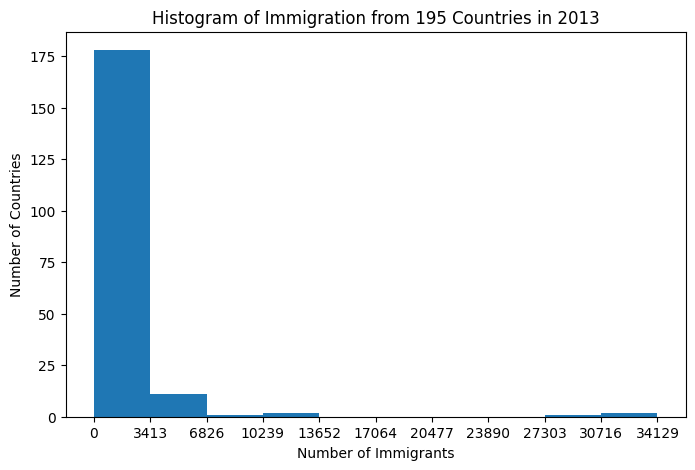

In [16]:
df_can['2013'].head(5)
count, bin_edges = np.histogram(df_can['2013'])
print(count)
print(bin_edges)
df_can['2013'].plot(kind='hist', xticks=bin_edges, figsize=(8,5))
plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')
plt.show()

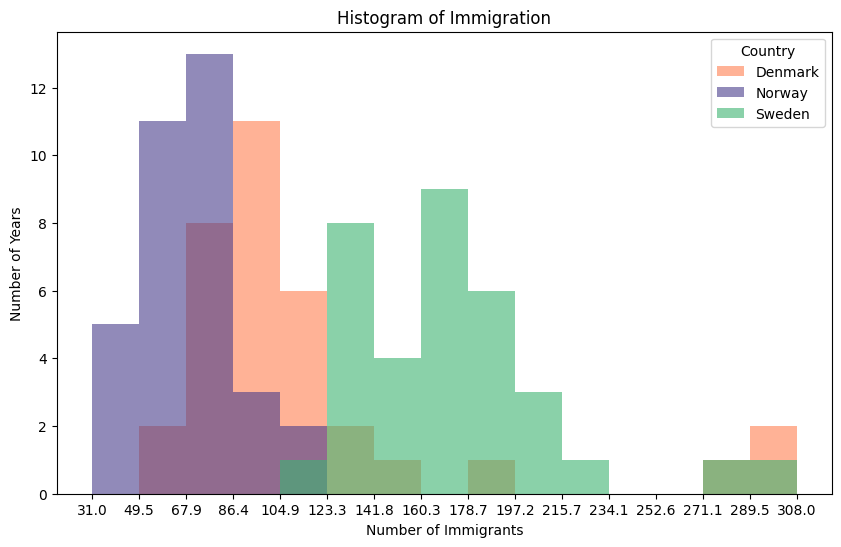

In [17]:

moi = df_can.loc[['Denmark', 'Norway', 'Sweden'],years]
moi = moi[years].transpose()
moi.head()
dem, canh = np.histogram(moi, 15)
#xmin = canh[0]-10
#xmax = canh[-1]+10
moi.plot(kind='hist', bins=15, #stacked=True, xlim=(xmin, xmax),
         alpha =0.6, color=['coral', 'darkslateblue', 'mediumseagreen'],xticks=canh, figsize=(10,6))
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Years')
plt.title('Histogram of Immigration')
plt.show()

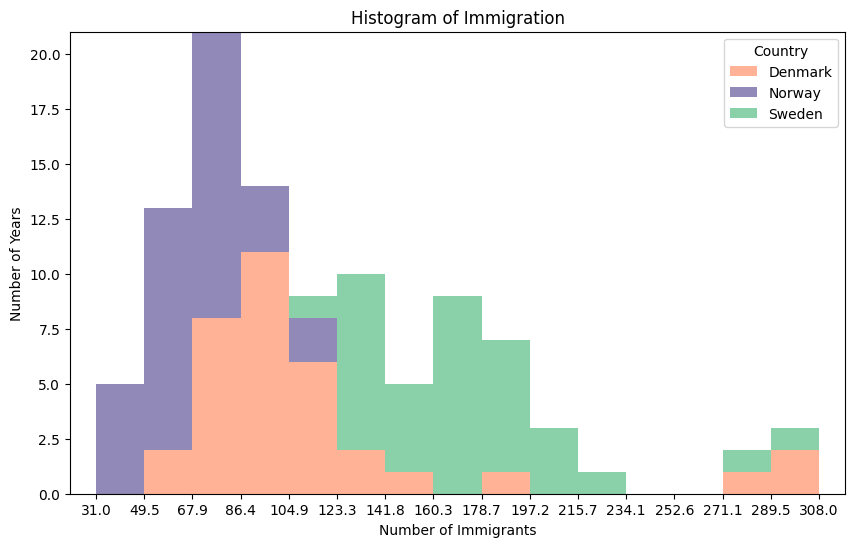

In [18]:
xmin = canh[0]-10
xmax = canh[-1]+10
moi.plot(kind='hist', bins=15, stacked=True, xlim=(xmin, xmax),
         alpha =0.6, color=['coral', 'darkslateblue', 'mediumseagreen'],xticks=canh, figsize=(10,6))
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Years')
plt.title('Histogram of Immigration')
plt.show()

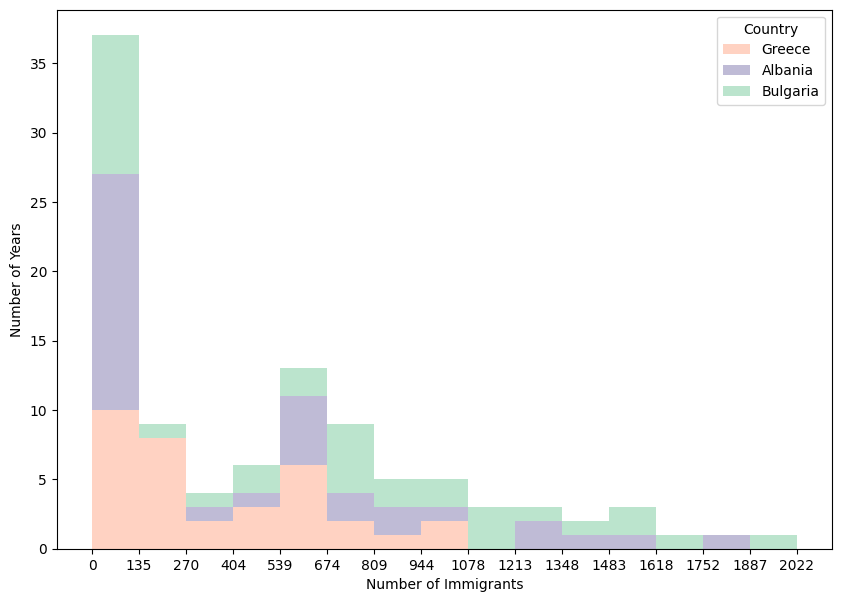

In [19]:
new2 = df_can.loc[['Greece','Albania','Bulgaria'], years]
new2 = new2[years].transpose()
count1, bined = np.histogram(new2, 15)
xmin = bined[0] - 10
xmax = bined[-1] + 10
new2.plot(kind='hist', 
          alpha = 0.35, bins=15, stacked=True,
          xticks=bined, color=['coral', 'darkslateblue', 'mediumseagreen'],
          figsize=(10,7))
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()


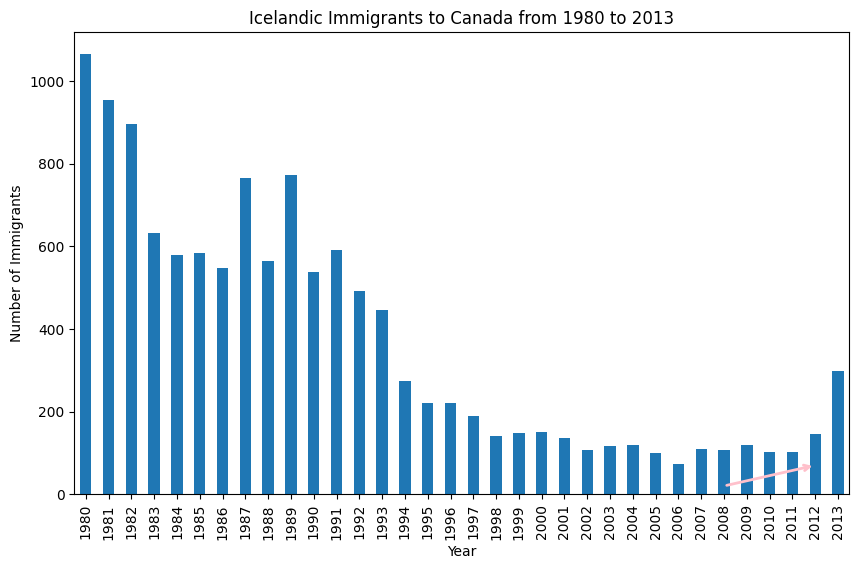

In [20]:
just1 = df_can.loc['Greece', years]
just1.plot(kind ='bar', figsize = (10,6))
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='pink', lw=2)
             )

plt.show()

In [21]:
just1.head()

1980    1065
1981     953
1982     897
1983     633
1984     580
Name: Greece, dtype: object

<Axes: ylabel='Total'>

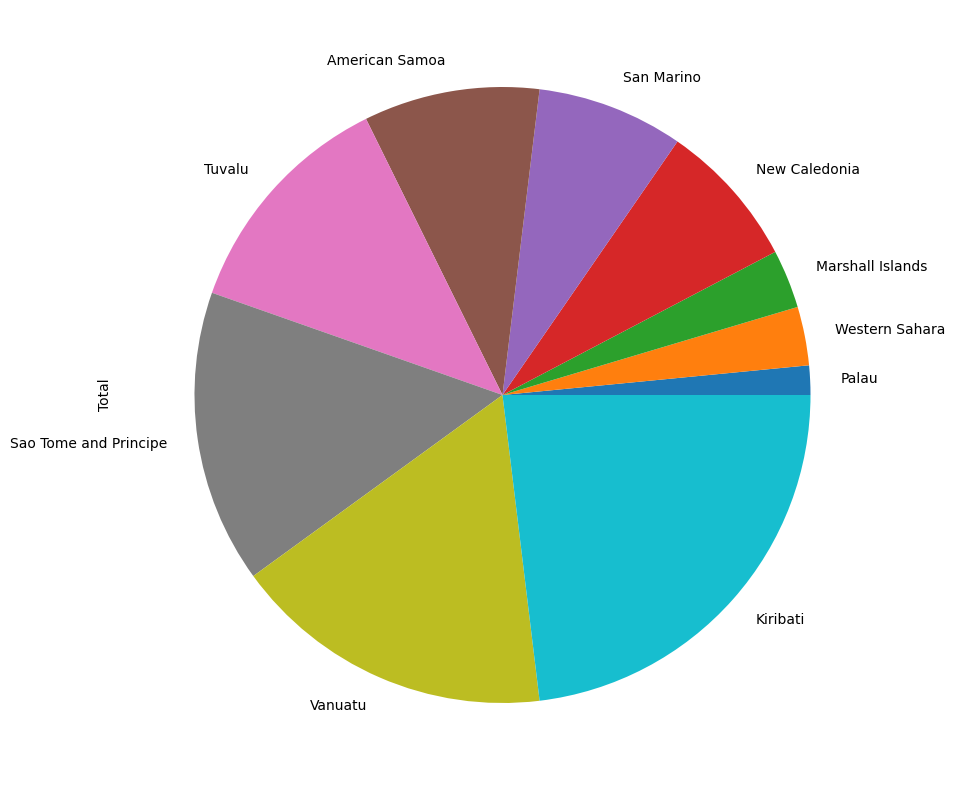

In [22]:
df_can['Total'].head(10).plot(kind='pie', figsize=(10,10))

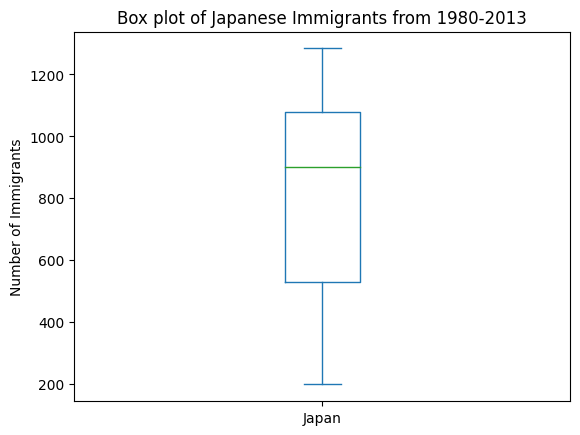

In [23]:
df_can_japan = df_can.loc[['Japan'],years].transpose()
df_can_japan.plot(kind='box')
plt.title('Box plot of Japanese Immigrants from 1980-2013')
plt.ylabel("Number of Immigrants")
plt.show()

In [24]:
df_continents = df_can.groupby('Continent', axis=0).sum()
print(type(df_continents))
df_continents.drop('Region', axis =1, inplace=True)
df_continents.head()

<class 'pandas.core.frame.DataFrame'>


,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,Developing regionsDeveloping regionsDeveloping...,3951,4363,3819,2671,2639,2650,3782,7494,7552,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,Developing regionsDeveloping regionsDeveloping...,31025,34314,30214,24696,27274,23850,28739,43203,47454,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,Developed regionsDeveloped regionsDeveloped re...,39760,44802,42720,24638,22287,20844,24370,46698,54726,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,Developing regionsDeveloping regionsDeveloping...,13081,15215,16769,15427,13678,15171,21179,28471,21924,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,Developed regionsDeveloped regions,9378,10030,9074,7100,6661,6543,7074,7705,6469,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


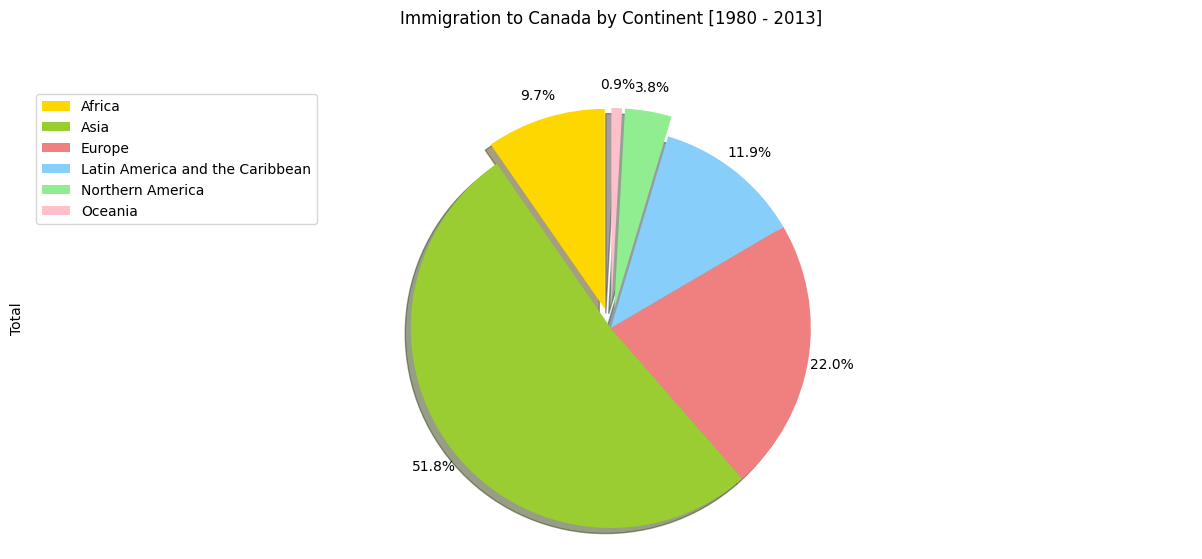

In [25]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

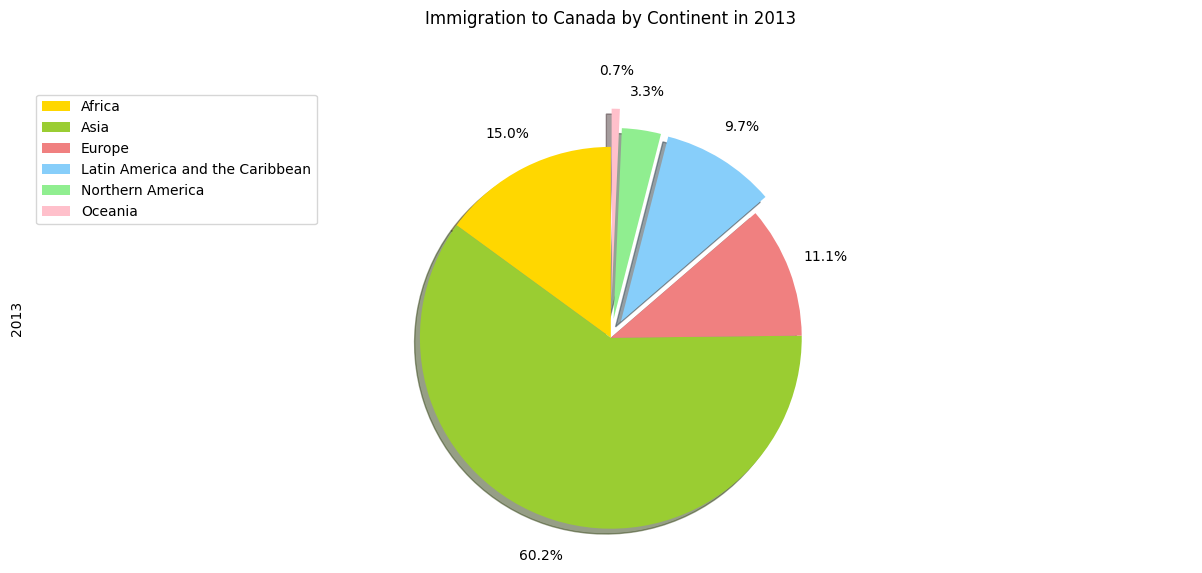

In [26]:
explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2]
df2013 = df_continents['2013']
df2013.head()
df2013.plot(kind='pie', figsize=(15,6), autopct='%1.1f%%', startangle=90, shadow=True, labels=None, pctdistance=1.2, 
            colors = colors_list, explode = explode_list)
plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
plt.axis('equal') 

    # add legend
plt.legend(labels=df_continents.index, loc='upper left') 

    # show plot
plt.show()


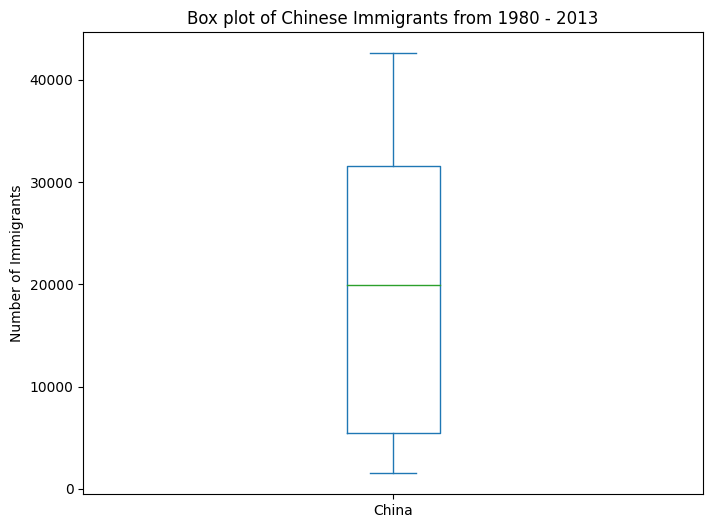

In [27]:
df_Cl = df_can.loc['China', years]
df_Cl.plot(kind='box',figsize=(8, 6))

plt.title('Box plot of Chinese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [28]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)
df_top15 = df_can.head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [29]:
years_80s = list(map(str, range(1980, 1990)))
years_90s = list(map(str, range(1990, 2000)))
years_00s = list(map(str, range(2000, 2010)))
df_80s = df_top15.loc[:, years_80s].sum(axis=1)
df_90s = df_top15.loc[:, years_90s].sum(axis=1)
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

Get the new Data with a column of year, a column of the sum of countries in that year

In [30]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
df_tot.index = map(int, df_tot.index)
df_tot.reset_index(inplace=True)
df_tot.columns = ['year', 'total']
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


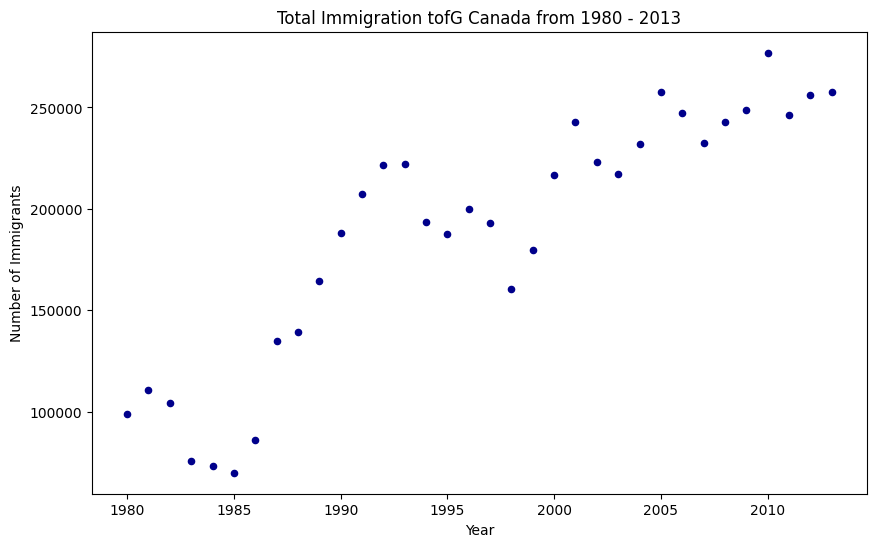

In [31]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10,6), color='darkblue')
plt.title('Total Immigration tofG Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

Cụ thể, np.polyfit(x, y, deg=1) có các tham số sau:

x: mảng NumPy chứa các giá trị trục hoành (giá trị x) của các điểm dữ liệu
y: mảng NumPy chứa các giá trị trục tung (giá trị y) tương ứng với các giá trị x tương ứng
deg: bậc của hàm đa thức mong muốn. Nếu deg được đặt bằng 1, hàm đa thức sẽ là hàm bậc nhất (đường thẳng tuyến tính).

In [32]:
x = df_tot['year']
y = df_tot['total']
fit = np.polyfit(x,y, deg=1)
fit

array([ 5.56709228e+03, -1.09261952e+07])

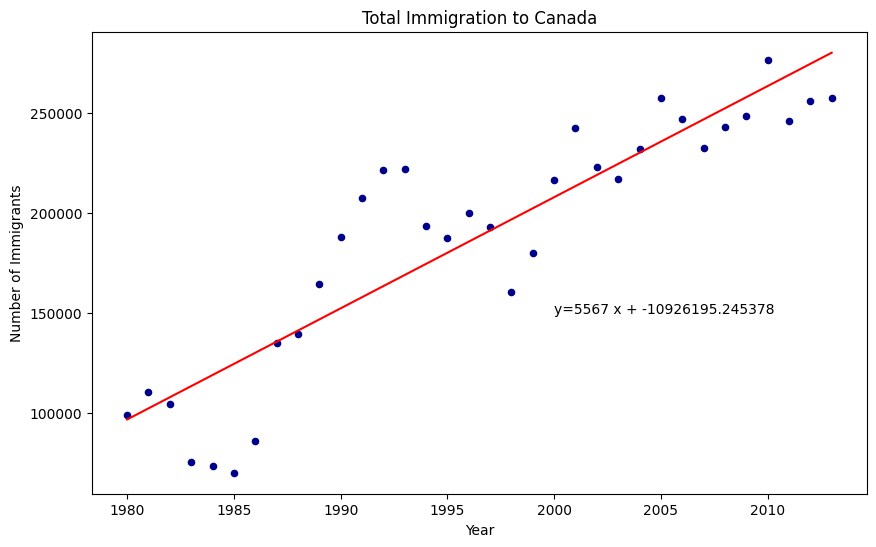

In [33]:
df_tot.plot(kind='scatter', x='year', y = 'total', figsize=(10,6), color='darkblue')
plt.title('Total Immigration to Canada')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.plot(x, fit[0]*x + fit[1], color='red')
plt.annotate('y={0:.0f} x + {1:0f}'.format(fit[0], fit[1]), xy=(2000, 150000))
plt.show()

In [34]:
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years]
df_total = pd.DataFrame(df_countries[years].sum(axis=0))
df_total.reset_index(inplace=True)
df_total.columns = ['year', 'total']
df_total

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252
5,1985,285
6,1986,336
7,1987,387
8,1988,373
9,1989,387


In [35]:
# transposed dataframe
df_can_t = df_can[years].transpose()

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country,Year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,...,0,0,0,0,0,1,0,0,0,0
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,...,0,0,0,1,1,0,0,0,0,0
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,0
3,1983,7338,1863,10015,4562,900,7100,1592,197,1081,...,1,0,0,0,0,0,0,0,0,0
4,1984,5704,1527,10170,3801,668,6661,1977,1086,847,...,0,0,0,1,0,0,0,0,0,0


In [36]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

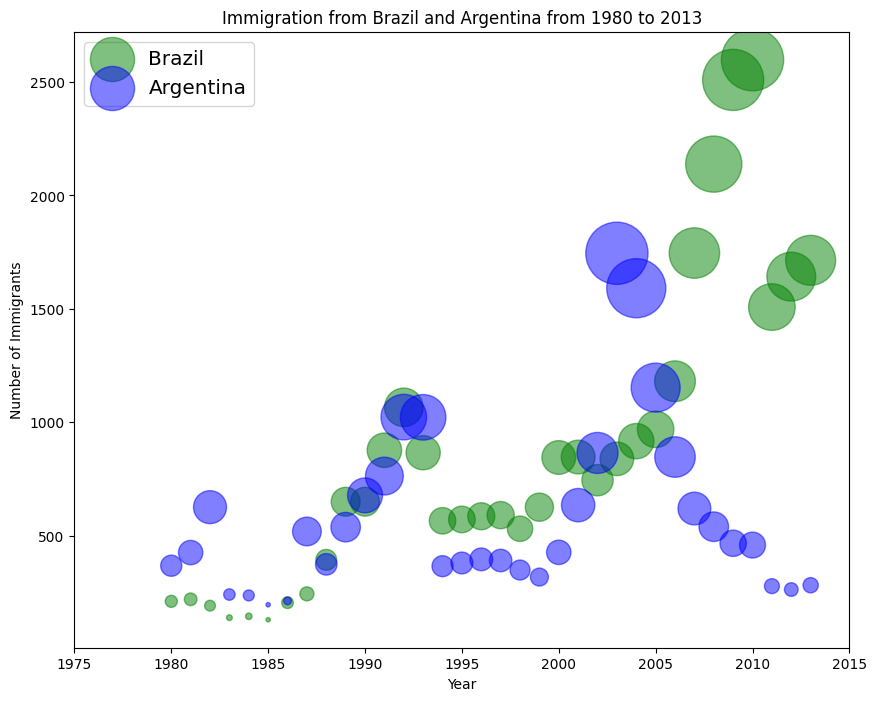

In [37]:
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(10, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

In [38]:

# Uncomment if running locally, else download data using the following code cell
recipes = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/recipes.csv")

In [39]:
recipes.head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


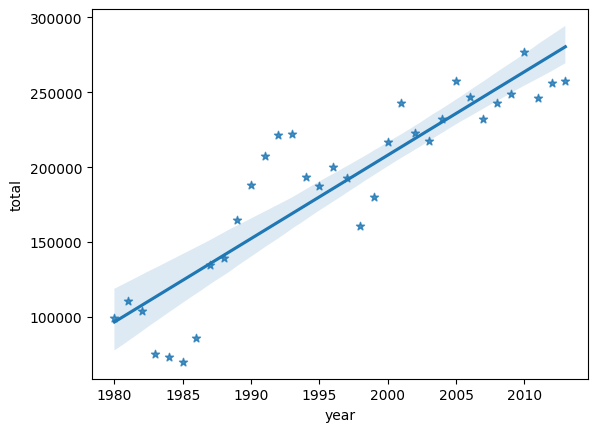

In [40]:
df_tot
ax = sns.regplot(x='year', y='total', data=df_tot, marker='*')


In [41]:
df_tot.plot(kind='waffle')

ValueError: waffle is not a valid plot kind

In [ ]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_countries.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

In [ ]:
#df_countries['Total'] = df_countries.iloc[:, 3:37].sum(axis=1)
total_values = df_countries['Total'].sum()
category_proportions = df_countries['Total'] / total_values

# let's view the first five elements and see how the dataframe was changed
print(total_values)
pd.DataFrame({"Category Proportion": category_proportions})

80960


,Category Proportion
Country,
Denmark,0.300099
Norway,0.200395
Sweden,0.499506


In [ ]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_countries.index.values # categories
values = df_countries['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

Total number of tiles is 400
Denmark: 120
Norway: 80
Sweden: 200


NameError: name 'mpatches' is not defined

<Figure size 640x480 with 0 Axes>

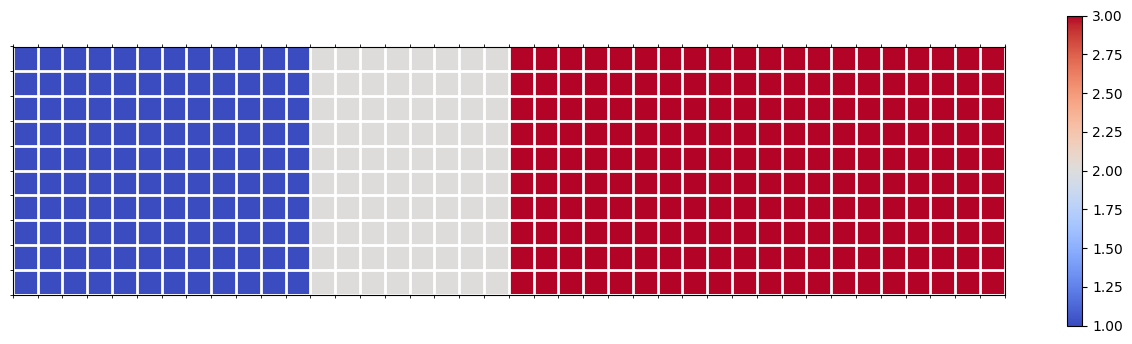

In [ ]:
create_waffle_chart(categories, values, height, width, colormap)

In [ ]:
au = sns.regplot(x=years, y='total', data = df_countries, marker='*')

KeyError: 'total'

In [ ]:
df_countries

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,62,101,97,108,81,92,93,94,81,24296
Norway,116,77,106,51,31,54,56,80,73,76,...,57,53,73,66,75,46,49,53,59,16224
Sweden,281,308,222,176,128,158,187,198,171,182,...,205,139,193,165,167,159,134,140,140,40440


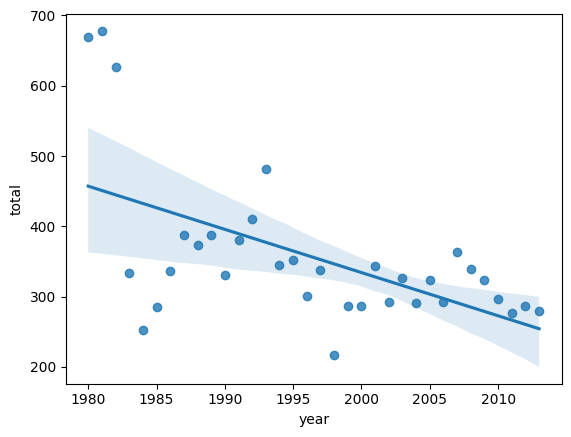

In [ ]:
df_15 = df_can.loc[['Denmark', 'Sweden','Norway'],years].transpose()
df_15.head()
df_15 = pd.DataFrame(df_15.sum(axis=1))
df_15.reset_index(inplace=True)
df_15.columns = ['year','total']
df_15.head()
df_15['year'] = df_15['year'].astype(int)
au = sns.regplot(x='year', y='total', data = df_15)

In [ ]:
import folium

In [ ]:
world_map = folium.Map()
world_map

In [ ]:
import plotly